(comp/00-algorithms)=
# Coding Problems

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Ongoing&color=orange)
[![Source](https://img.shields.io/static/v1.svg?label=GitHub&message=Source&color=181717&logo=GitHub)](https://github.com/particle1331/ok-transformer/blob/master/docs/nb/comp/00-algorithms.ipynb)
[![Stars](https://img.shields.io/github/stars/particle1331/ok-transformer?style=social)](https://github.com/particle1331/ok-transformer)
[![LeetCode user particle1331](https://img.shields.io/badge/dynamic/json?style=flat&labelColor=black&color=%23ffa116&label=Solved&query=solvedOverTotal&url=https%3A%2F%2Fbadge.xyli.tech/%2Fapi%2Fusers%2Fparticle1331&logo=leetcode&logoColor=yellow)](https://leetcode.com/particle1331/)


---

## Backtracking

Backtracking algorithms are used to systematically explore all possible solutions. The basic idea is to build a solution incrementally, while making choices along the way. At each step, the algorithm explores a possible choice and then recursively explores further choices based on that choice. If a certain choice leads to a dead-end or an invalid solution, the algorithm "backtracks" either by undoing the last choice, or terminating the current solution path, and moving on to the next option. Fast backtracking algorithms are able to quickly determine and thereby terminate incorrect solution paths.

### Reverse Shuffle Merge

**Problem.** [[Reverse Shuffle Merge](https://www.hackerrank.com/challenges/reverse-shuffle-merge/problem) (HR)]. Given a string $S$ containing characters with even counts, we want to find a lexically minimal string $A$ containing half of each characters of $S$ such that $a_i = s_{j_i}$ where $j_{k} \leq j_{k-1} \leq \ldots \leq j_1$ with $k = \frac{1}{2}|S|.$ For example, if $S$ is `eggcegcg` then $A$ is the string `cegg` which can be constructed as `·gg·e·c·` within $S$.

**Solution.** Note that we can iterate over $S$ from right to left choosing to skip or take a character. Since $A$ has to be minimal, we want to take minimal characters, and skip those that are large. However, skipping too often can also result in a suboptimal solution. Consider `S = 'cdeedcaaaa'` here skipping `c` and `d` gets us in trouble since `e` reaches its skip limit of 1/2 its count, and we are forced to take it, getting the suboptimal solution `A = 'aaedc'`. Hence, we want to take characters, unless we are forced to skip, or we have better options:

In [1]:
from collections import Counter

def solve(S):
    counts = Counter(S)
    chars = counts.keys()
    A = ['.']
    take_count = {c: 0 for c in chars}
    skip_count = {c: 0 for c in chars}

    def take(s):
        A.append(s)
        take_count[s] += 1

    def skip(s):
        skip_count[s] += 1

    def squash(s):
        while (len(A) > 1) and (A[-1] > s) and (skip_count[A[-1]] < counts[A[-1]] / 2):
            skip_count[A[-1]] += 1
            take_count[A[-1]] -= 1
            A.pop()
        take(s)

    for s in S[::-1]:        
        if take_count[s] == counts[s] / 2:
            skip(s)
        else:
            squash(s)

    return "".join(A[1:])


S = "eggcegcg"
A = solve(S)
A

'cegg'

Notice that instead of `take(s)` we have `squash(s)`. The trick is to construct chains: `a <= a <= c <= d` and  if we encounter `b` such that `d > b`, then we backtrack by popping `d` and `c` assuming the skip limit allows it. Our sequence then becomes `a <= a <= b`. The equals is important here to allow consecutive same characters. This is also why we added `.` at the start which is smaller than any character. 

Observe that the `squash` function only takes into account `A` and ignores skipped characters. This is fine since instances of these characters are already optimally placed in the chain. It only adds more skipped characters which are suboptimal in the chain compared to the current queried character. Trying a more complicated input:

In [2]:
def viz(S):
    chars = Counter(S)
    d = {c: [] for c in sorted(chars.keys(), reverse=True)}

    for s in S[::-1]:
        for c in d.keys():
            if c == s:
                d[c].append(s + ' ')
            else:
                d[c].append('  ')

    for c in d.keys():
        print(''.join(d[c]))



S = "dcadeebcccaaba."
viz(S)
print()
print(f"S = {S[:-1]}")
print("A =", solve(S)[1:])

                  e e         
                      d     d 
          c c c           c   
    b           b             
  a   a a               a     
.                             

S = dcadeebcccaaba
A = aacbecd


```{figure} ../../img/comp/greedy-1-soln-1.png
---
width: 60%
---
To respect optimality, we try as much as possible to have our curve in the bottom half of the diagonal. At the start, `b` is squashed after getting `a <= b ? a` while the third `a` skipped. Then, we get consecutive `c <= c ? b` (last `c` is skipped due to take limit) only the latter `c` is popped due to skip limit. Next, we encounter two `e`, the latter skipped due to take limit. And so on. Marked characters are skipped while unmarked characters were squashed (essentially also skipped).
```

### Generate Parenthesis

**Problem.** [[Generate Parenthesis](https://leetcode.com/problems/generate-parentheses/description/?envType=study-plan-v2&envId=top-100-liked) (LC #22)]. Given $n$ pairs of parentheses, generate all strings of well-formed parentheses. For $n = 1$, the only solution is `'()'`.

**Solution.** Suppose you have a string of well-formed parentheses, then you can only add `(`. If you have `(` in excess, you can add enough `)` or add more `(` until its count reaches $n$. Hence, we can just branch off at each candidate solution by adding `(` or `)` while keeping constraints in check. This ultimately results in well-formed parentheses at the leaves. 

In [3]:
def solve(n):
    out = [(0, 0, "")]
    while True:
        tmp = []
        for res in out:
            l, r, s = res
            if l < n:
                tmp.append((l + 1, r, s + "("))
            if l > r:
                tmp.append((l, r + 1, s + ")"))
        
        if len(tmp) == 0:
            return [s for (l, r, s) in out]
        else:
            out = tmp


print(solve(1))
print(solve(3))

['()']
['((()))', '(()())', '(())()', '()(())', '()()()']


**Remark.** Candidate solutions are represented as tuples `(l, r, s)` containing left parenthesis count `l`, right parenthesis count `r`, and the constucted string `s`.

<br>

```{figure} ../../img/comp/parenthesis-perf.png
---
width: 80%
---
```

### Combination Sum

**Problem.** [[Combination Sum](https://leetcode.com/problems/combination-sum/?envType=study-plan-v2&envId=top-100-liked) (LC #39)]. Given a sequence $S = (s_1, \ldots, s_n)$ of distinct integers and a target $t$, generate all sequences $(s_{j_1}, \ldots, s_{j_k})$ such that $s_{j_1} \leq \ldots \leq s_{j_k}$ and $s_{j_1} + \ldots + s_{j_k} = t$. For example, let $S = (2, 3, 5)$ and $t = 8.$ Then, the expected solution is the set of sequences $(2, 2, 2, 2)$, $(2, 3, 3)$, and $(3, 5).$

**Solution.** Our solution iteratively constructs paths (sequences starting from single integers) from previous paths which are still open, i.e. those whose sum does not exceed or equal the target. This would make more sense by looking at the algorithm for the given example:

```{margin}
- `?` = open
- `x` = exceeds target
- `/` = equals target
```
```
depth = 1
5 ?
3 ?
2 ?

depth = 2
5 5 x
5 3 /
5 2 ?
3 3 ?
3 2 ?
2 2 ?

depth = 3
5 2 2 x
3 3 3 x
3 3 2 x
3 2 2 ?
2 2 2 ?

depth = 4
3 2 2 2 x
2 2 2 2 /
```

Note that each open path is appended by an integer less than or equal the last integer. This is important for constructing all unique sequences. The algorithm terminates when there are no more open paths. Below we also cache intermediate path values (i.e. its total sum) for faster evaluation (summing two numbers).

In [4]:
def solve(S, t, reverse=True):
    solution = [[t]] if t in S else []
    S = list(filter(lambda s: s < t, sorted(S, reverse=reverse)))

    paths = list(zip([(i,) for i in range(len(S))], S))

    while len(paths) > 0:
        tmp = []
        for path in paths:
            seq, val = path
            i = seq[-1]
            for j in range(i, len(S)):
                seqj, valj = seq + (j,), val + S[j]
                if valj == t:
                    solution.append([S[k] for k in seqj])
                if valj < t:
                    tmp.append((seqj, valj))
        paths = tmp

    return solution


solve(S=[2, 3, 5, 8], t=8)

[[8], [5, 3], [3, 3, 2], [2, 2, 2, 2]]

**Remark.** It is important to close out larger sequences first. This explains why we reversed `S`. This way we avoid creating long sequences which will exceed the target anyway. For example, we close out `5 2 2 x` early instead of wasting constructing `2 2 2 5 x` if we start with `2` instead of `5`.

In [5]:
%%time
S = [24, 16, 30, 7, 5, 4, 9, 29, 8, 35, 3, 17]
t = 29
solve(S, t);

CPU times: user 266 µs, sys: 3 µs, total: 269 µs
Wall time: 271 µs


In [6]:
%%time
solve(S, t, reverse=False);

CPU times: user 429 µs, sys: 0 ns, total: 429 µs
Wall time: 430 µs


<br>

```{figure} ../../img/comp/combination-sum.png
---
width: 70%
---
```

### Permutations

**Problem.** [[Permutations](https://leetcode.com/problems/permutations/) (LC #46)]. Generate all permutations of a sequence of distinct integers $S.$ 

**Solution.** Our solution is construct sequences starting from singletons and appending these with integers that in $S$ that are not yet in the sequence. Each intermediate sequence $(s_1, \ldots, s_k)$ where $k \leq n = |S|$ is a node in the tree with root node $(s_1)$ for $s \in S.$ Each node combines the output of its children $(s_1, \ldots, s_k, s_j)$ where $s_j \in S - \{s_1, \ldots, s_k\}$, with the final leaves returning the node when $k = n.$ 

The algorithm is sketched below for a set of three elements `S = [0, 1, 2]`. This generates the tree with root node `[0]`. Note that all possible permutations starting with `0` is covered:

```python
branch([0]) = branch([0] + [1]) + branch([0] + [2])
            = branch([0, 1]) + branch([0, 2])
            = branch([0, 1] + [2]) + branch([0, 2] + [1])
            = branch([0, 1, 2]) + branch([0, 2, 1])
            = [[0, 1, 2]] + [[0, 2, 1]]
            = [[0, 1, 2], [0, 2, 1]]
```

Final solution:

In [7]:
def solve(S):
    def branch(node):
        if len(node) == len(S):
            return [node]
        return sum([branch(node + [j]) for j in set(S) - set(node)], [])
        
    return sum([branch([s]) for s in S], [])

solve([0, 1, 2])

[[0, 1, 2], [0, 2, 1], [1, 0, 2], [1, 2, 0], [2, 0, 1], [2, 1, 0]]

<br>

```{figure} ../../img/comp/permutation-perf.png
---
width: 80%
---
```

### N-Queens

**Problem.** [[N-Queens](https://leetcode.com/problems/n-queens/?envType=study-plan-v2&envId=top-100-liked) (LC #51)]. Let $1 \leq n \leq 9.$ Place $n$ queens on an $n \times n$ chessboard such that no two queens attack each other. Return all distinct solutions.

**Solution.** First let us implement a class for the **board state**:

In [8]:
from pprint import pprint

class NQueens:
    def __init__(self, n):
        self.n = n
        self.queens = set()
        self.blocked = set()

    def place_queen(self, i, j):
        for _ in range(self.n):
            self.blocked.add((i, _))
            self.blocked.add((_, j))

        x, y = i, j
        while (x >= 0) and (y >= 0):
            self.blocked.add((x, y))
            x -= 1
            y -= 1 

        x, y = i, j
        while (x >= 0) and (y < self.n):
            self.blocked.add((x, y))
            x -= 1
            y += 1

        x, y = i, j
        while (x < self.n) and (y >= 0):
            self.blocked.add((x, y))
            x += 1
            y -= 1

        x, y = i, j
        while (x < self.n) and (y < self.n):
            self.blocked.add((x, y))
            x += 1
            y += 1

        self.queens.add((i, j))

    def viz_board(self):
        board = [['□'] * self.n for _ in range(self.n)]
        for i, j in self.blocked:
            board[i][j] = '☒'

        for i, j in self.queens:
            board[i][j] = '♕'

        for row in board:
            print(''.join(row))
        print()

Failed solution since the third row is entirely blocked:

In [9]:
state = NQueens(n=4)

state.place_queen(0, 0)
state.viz_board()

state.place_queen(1, 2)
state.viz_board()

♕☒☒☒
☒☒□□
☒□☒□
☒□□☒

♕☒☒☒
☒☒♕☒
☒☒☒☒
☒□☒☒



Looking at the above process already gives us an idea of how to solve this. Note that all valid solutions has exactly one Queen on every row. This allows us to represent a valid solution as an array of length $n.$ In the code below this is `node`. Each Queen placement results in blocked squares in the next row. This limits the next possible placements. Each choice of next placement results in branching separate game states which we pass along recursively. If the next row is completely blocked, the `branch` function returns `[]`.

In [10]:
from copy import deepcopy

def branch(node, state):
    state = deepcopy(state)
    k = len(node)
    state.place_queen(k-1, node[-1])

    if len(node) == state.n:
        return [node]

    out = []
    for j in range(state.n):
        if not (k, j) in state.blocked:
            out.append(branch(node + [j], state))

    return sum(out, [])


def solve(n):
    state = NQueens(n=n)
    return sum([branch([i], state) for i in range(n)], [])


solution = solve(n=4)
print(solution)

[[1, 3, 0, 2], [2, 0, 3, 1]]


A solution can be visualized by following each Queen placement:

In [11]:
state = NQueens(n=4)
s = solution[0]
for i, j in enumerate(s):
    state.place_queen(i, j)
    state.viz_board()

☒♕☒☒
☒☒☒□
□☒□☒
□☒□□

☒♕☒☒
☒☒☒♕
□☒☒☒
□☒□☒

☒♕☒☒
☒☒☒♕
♕☒☒☒
☒☒□☒

☒♕☒☒
☒☒☒♕
♕☒☒☒
☒☒♕☒



```{figure} ../../img/comp/nqueens.png
---
width: 80%
---
Solution is relatively slow and memory inefficient. Probably the board state can be implemented with less bloat. Moreover, notice that solutions have symmetry (e.g. mirror). The tradeoff is that our code is highly readable.
```

### Word Search

**Problem.** [[Word Search](https://leetcode.com/problems/word-search/?envType=study-plan-v2&envId=top-100-liked) (LC #79)]. Let $1 \leq m, n \leq 6.$ Given an $m \times n$ of characters and a word $w.$ Determine if $w$ exists in the grid. Meaning $w$ can be constructed using horizontally or vertically adjacent cells. The same letter cell may not be used more than once.

**Solution.** Still using our favorite solution pattern: branching off at nodes given certain conditions. Here node is a list of coordinates. We start our nodes at the coordinates of the starting letter of the given word. Then we branch off at each neighboring node (vertical or horizontal adjacent cells) appending the coordinates to the node. 

If a neighboring cell is not the next letter, the branch is quickly terminated by returning `False`. Otherwise, it continues until the entire word is constructed. The result of branching is a list of Booleans which contains `True` if the word is found. Note that letters already in the node are ruled out (`indices - set(node)`) since we can't reuse cells.

In [12]:
def solve(board, word):
    m = len(board)
    n = len(board[0])

    def validate(word):
        w = Counter(word)
        b = Counter(''.join(sum(board, [])))
        return all(w[c] <= b[c] for c in w.keys())

    def neighbors(node):
        i, j = node[-1]
        indices = set([
            (min(i+1, m-1), j),
            (max(i-1,   0), j),
            (i, max(j-1,   0)),
            (i, min(j+1, n-1)),
        ])
        return set([(x, y) for x, y in indices - set(node)])

    def decode(node):
        return ''.join([board[x][y] for x, y in node])

    def branch(node):
        if decode(node) == word:
            return [True]

        if decode(node) != word[:len(node)]:
            return [False]
        
        return sum(
            [branch(node + [(x, y)]) for x, y in neighbors(node) - set(node)], 
            [False]
        )

    if not validate(word):
        return False

    init_nodes = [(x, y) for x in range(m) for y in range(n) if board[x][y] == word[0]]
    return any(sum([branch([(x, y)]) for x, y in init_nodes], []))


board = [
    ['A','B','C','E'],
    ['S','F','C','S'],
    ['A','D','E','E']
]
word = 'ABCCED'
solve(board, word)

True

<br>

```{figure} ../../img/comp/word-search-perf.png
---
width: 80%
---
TLE unless we use `validate`.
```

### Palindrome Partitioning

**Problem.** [[Palindrome Partitioning](https://leetcode.com/problems/palindrome-partitioning/) (LC #131)]. Let $s$ be a string such that $1 \leq |s| \leq 16.$ Generate all partitions of $s$ into substrings such that every 
element of the partition is a palindrome. For example, if `s = aab`, then the solution consists of `[a, a, b]` and `[aa, b]`.

**Solution.** Observe that the first partition can be obtained by sliding across the given string: `a`, `aa`, or `aab`. Taking only palindromes, we are left with `a` and `aa`. Then, we repeat this process for the leftover strings `ab` and `b`, respectively. Sliding left to right works since the elements of the partition consists of substrings. Note that this process always returns the partition containing every single character.

In [13]:
def is_palindrome(s: str):
    return s == s[::-1]

def solve(s, verbose=False):
    def branch(node, s):
        if verbose:
            print(node, s)
        if len(s) == 0:
            return [node]
        return sum(
            [branch(node + [s[:i]], s[i:]) for i in range(1, len(s) + 1) if is_palindrome(s[:i])], 
            []
        )
    return branch([], s)


solve("aab", verbose=True)

[] aab
['a'] ab
['a', 'a'] b
['a', 'a', 'b'] 
['aa'] b
['aa', 'b'] 


[['a', 'a', 'b'], ['aa', 'b']]

**Remark.** Entries of the `node` variable are always valid partitions. The node takes `s[:i]` and passes `s[i:]` as the next string for nonzero `i`, so the resulting partition always sums to the original `s`. Finally, since we scan over all possible next partition, we get all solutions and the constructed solutions are distinct.

<br>

```{figure} ../../img/comp/palindrome-partitioning-perf.png
---
width: 80%
---
```

## Binary Search

4. Median of Two Sorted Arrays

In [53]:
def solve(m, n):
    merged = []

    i = 0
    j = 0
    while i < len(n) and j < len(m):
        if n[i] < m[j]:
            merged.append(n[i])
            i += 1

        elif n[i] == m[j]:
            merged.append(n[i])
            merged.append(m[j])
            i += 1
            j += 1

        elif m[j] < n[i]:
            merged.append(m[j])
            j += 1

    merged += n[i:]
    merged += m[j:]
    M = len(merged)
    k = int(M / 2)

    if M % 2 == 0:
        return (merged[k] + merged[k-1]) / 2
    else:
        return merged[k]


n = [1]
m = [2, 3, 4]
solve(m, n)

2.5

33. Search in Rotated Sorted Arrays

**Problem.** Consider distinct integers
$t_0 < \ldots < t_{n-1} \in \mathbb{Z}.$ Given a rearrangement $S = (t_k, \ldots, t_{n-1}, t_0, \ldots, t_{k-1})$ for $k \geq 1$ and $a \in S,$ find $j$ such that $s_j = a.$ The search algorithm must be $O(\log n).$ 

**Solution.** A solution in $O(n)$ time is to just look at each element of $S$ and compare with $a.$ This actually gets accepted in LC. To get the desired $O(\log n)$ we have to perform some form of binary search.

In [61]:
import math

def solve(S, a):
    def bisect(j, S):
        n = len(S)
        if n == 1:
            return j if S[0] == a else -1

        if S[0] < S[-1]:
            if a < S[0] or S[-1] < a:
                return -1

        if S[0] > S[-1]:
            if a < S[0] and S[-1] < a:
                return -1

        if a == S[0]:
            return j
        if a == S[-1]:
            return j + (n - 1)

        k = math.ceil(n / 2)
        return max(bisect(j, S[:k]), bisect(j + k, S[k:]))

    return bisect(0, S)


S = [4, 5, 6, 7, 0, 1, 2]
a = 0
solve(S, a)

4

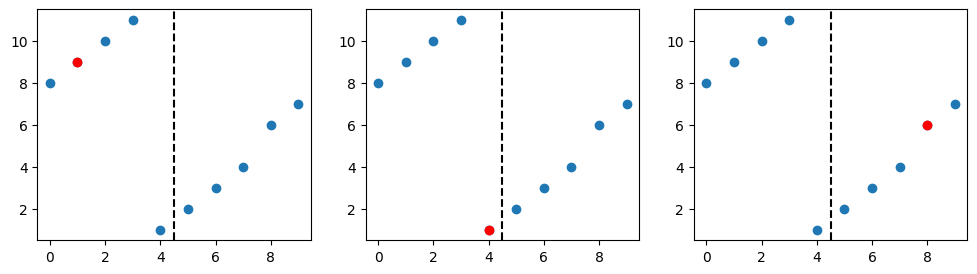

In [60]:
import matplotlib.pyplot as plt

S = [8, 9, 10, 11, 1, 2, 3, 4, 6, 7]
n = len(S)
k = math.ceil(n / 2)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
a = 9
ax[0].axvline(k - 0.5, linestyle='dashed', color='black')
ax[0].scatter(range(len(S)), S)
ax[0].scatter(S.index(a), a, color='red', label='target');

a = 1
ax[1].axvline(k - 0.5, linestyle='dashed', color='black')
ax[1].scatter(range(len(S)), S)
ax[1].scatter(S.index(a), a, color='red', label='target');

a = 6
ax[2].axvline(k - 0.5, linestyle='dashed', color='black')
ax[2].scatter(range(len(S)), S)
ax[2].scatter(S.index(a), a, color='red', label='target');

In [ ]:
a < S[0] or S[-1] < a


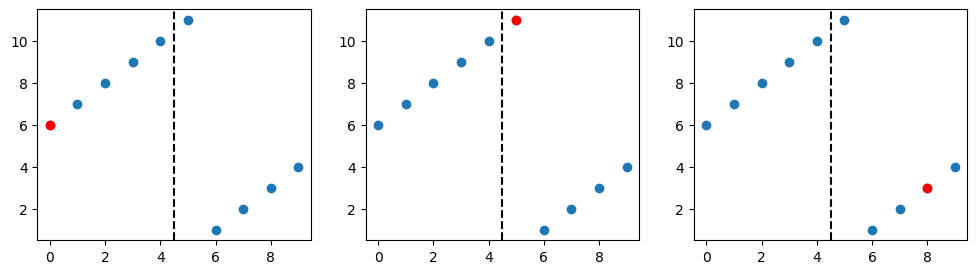

In [56]:
S = [6, 7, 8, 9, 10, 11, 1, 2, 3, 4]
n = len(S)
k = math.ceil(n / 2)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
a = 6
ax[0].axvline(k - 0.5, linestyle='dashed', color='black')
ax[0].scatter(range(len(S)), S)
ax[0].scatter(S.index(a), a, color='red', label='target');

a = 11
ax[1].axvline(k - 0.5, linestyle='dashed', color='black')
ax[1].scatter(range(len(S)), S)
ax[1].scatter(S.index(a), a, color='red', label='target');

a = 3
ax[2].axvline(k - 0.5, linestyle='dashed', color='black')
ax[2].scatter(range(len(S)), S)
ax[2].scatter(S.index(a), a, color='red', label='target');

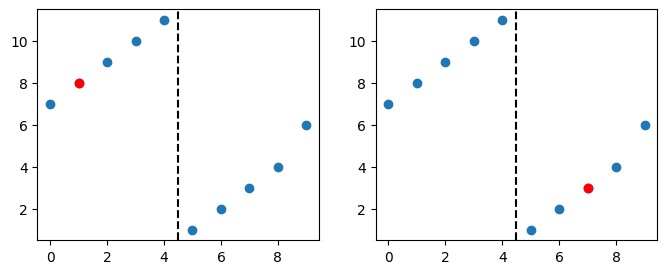

In [59]:
S = [7, 8, 9, 10, 11, 1, 2, 3, 4, 6]
n = len(S)
k = math.ceil(n / 2)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
a = 8
ax[0].axvline(k - 0.5, linestyle='dashed', color='black')
ax[0].scatter(range(len(S)), S)
ax[0].scatter(S.index(a), a, color='red', label='target');

a = 3
ax[1].axvline(k - 0.5, linestyle='dashed', color='black')
ax[1].scatter(range(len(S)), S)
ax[1].scatter(S.index(a), a, color='red', label='target');

In [7]:
math.ceil(6 / 2 - 1)

2

In [2]:
k = 3
0 [6, 7, 0, 1] 4 [2, 4, 5]
[6, 7, 0, 1]

SyntaxError: invalid syntax (229452801.py, line 1)

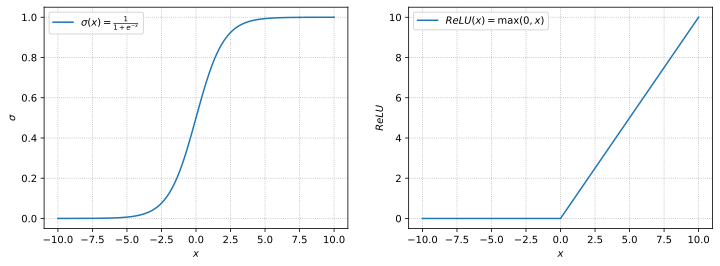

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

x = np.linspace(-10, 10, 1000)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
y = 1 / (1 + np.exp(-x))
ax[0].plot(x, y, label=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$")
ax[0].grid(linestyle='dotted')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel("$\sigma$")
ax[0].legend();

@np.vectorize
def relu(x):
    return max(0.0, x)

y = relu(x)
ax[1].plot(x, y, label=r"$ReLU(x) = \max(0, x)$")
ax[1].grid(linestyle='dotted')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel("$ReLU$")
ax[1].legend();